In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the training and testing datasets

df=pd.read_csv('C://Users/sojore/Documents/house-prices-advanced-regression-techniques (1)/train.csv')
df_test=pd.read_csv('C://Users/sojore/Documents/house-prices-advanced-regression-techniques (1)/test.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1365,1366,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,216000
1309,1310,20,RL,NaN,7153,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2008,WD,Normal,179200
156,157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
606,607,20,RL,82.0,12464,Pave,NaN,IR2,Low,AllPub,...,0,NaN,GdPrv,NaN,0,11,2009,WD,Normal,152000
1160,1161,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2010,WD,Normal,146000
1416,1417,190,RM,60.0,11340,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,122500
284,285,120,RL,50.0,8012,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,179200
1232,1233,90,RL,70.0,9842,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,101800
472,473,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,148000
1084,1085,60,RL,NaN,13031,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,187500


In [5]:
#lets explore columns with NAN values 
df_train_cols_with_nan=[column for column in df.columns if df[column].isnull().sum()>0]
for col in df_train_cols_with_nan:
    print(col)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [6]:
#columns with nan for test dataset
df_test_cols_with_nan=[column for column in df_test.columns if df_test[column].isnull().sum()>0]
for cols in df_test_cols_with_nan:
    print(cols)

MSZoning
LotFrontage
Alley
Utilities
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType


In [7]:
#next we handle these missing values in both df_test and df_train datasets

In [8]:
df.isnull().sum().head(10)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64

In [9]:
#exploring some columns
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [10]:
df['Alley'].isna().sum()

1369

In [11]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [12]:
df=df.drop(['Id'],axis='columns')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


handling the missing data

In [13]:
df['LotFrontage'].isna().sum()

259

In [14]:
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
379,60,RL,60.0,8123,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,179000
1132,70,RM,90.0,9900,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,117500
1033,20,RL,NaN,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2006,WD,Normal,230000
483,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,164000
1265,160,FV,35.0,3735,Pave,NaN,Reg,Lvl,AllPub,FR3,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,183900


we can simply drop the Alley column (minimal influence towards price prediction)

In [15]:
df1=df.drop('Alley',axis=1)
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
df1['SaleCondition'].isna().sum()

0

In [17]:
df1['SaleCondition'].mode()

0    Normal
dtype: object

In [18]:
df1['SaleCondition']=df1['SaleCondition'].fillna('Shed')

In [19]:
df1['SaleCondition'].isna().sum()

0

handling missing values on the train dataset

In [20]:
#
df1['LotFrontage']=df1['LotFrontage'].fillna(df1['LotFrontage'].median())
df1['MasVnrType']=df1['MasVnrType'].fillna('BrkCmn')
df1['MasVnrArea']=df1['MasVnrArea'].fillna(df1['MasVnrArea'].mean())
df1['BsmtQual']=df1['BsmtQual'].fillna('TA')
df1['BsmtCond']=df1['BsmtCond'].fillna('TA')
df1['BsmtExposure']=df1['BsmtExposure'].fillna('No')
df1['BsmtFinType1']=df1['BsmtFinType1'].fillna('Unf')
df1['BsmtFinType2']=df1['BsmtFinType2'].fillna('Unf')
df1['Electrical']=df1['Electrical'].fillna('SBrkr')
df1['FireplaceQu']=df1['FireplaceQu'].fillna('Gd')
df1['GarageType']=df1['GarageType'].fillna('Attchd')
df1['GarageYrBlt']=df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].median())
df1['GarageFinish']=df1['GarageFinish'].fillna('Unf')
df1['GarageQual']=df1['GarageQual'].fillna('TA')
df1['GarageCond']=df1['GarageCond'].fillna('TA')
df1['PoolQC']=df1['PoolQC'].fillna('Gd')
df1['Fence']=df1['Fence'].fillna('MnPrv')
df1['MiscFeature']=df1['MiscFeature'].fillna('Shed')

exploring the test dataset

In [21]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [22]:
df_test=df_test.drop('Alley',axis=1)
df_test.shape

(1459, 79)

In [23]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [24]:
columns_to_fill_na=['Exterior1st','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
                    'BsmtHalfBath','KitchenQual','Functional','GarageCars','GarageArea'
                   ]

here we fill the missing values with either mode,median or mean of the corresponding columns

In [25]:
#handling missing values on the test dataset
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].median())
df_test['MasVnrType']=df_test['MasVnrType'].fillna('BrkCmn')

df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['BsmtQual']=df_test['BsmtQual'].fillna('TA')
df_test['BsmtCond']=df_test['BsmtCond'].fillna('TA')
df_test['MSZoning']=df_test['MSZoning'].fillna('RL')
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna('No')
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna('Unf')
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna('Unf')
df_test['Electrical']=df_test['Electrical'].fillna('SBrkr')
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna('Gd')
df_test['GarageType']=df_test['GarageType'].fillna('Attchd')
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median())
df_test['GarageFinish']=df_test['GarageFinish'].fillna('Unf')
df_test['GarageQual']=df_test['GarageQual'].fillna('TA')
df_test['GarageCars']=df_test['GarageCars'].fillna(0)
df_test['GarageCond']=df_test['GarageCond'].fillna('TA')
df_test['SaleType']=df_test['SaleType'].fillna('WD')
df_test['PoolQC']=df_test['PoolQC'].fillna('Gd')
df_test['Fence']=df_test['Fence'].fillna('MnPrv')
df_test['MiscFeature']=df_test['MiscFeature'].fillna('Shed')
df_test['Utilities']=df_test['Utilities'].fillna('AllPub')
df_test['Exterior1st']=df_test['Exterior1st'].fillna('VinylSd')
df_test['Exterior2nd']=df_test['Exterior2nd'].fillna('VinylSd')
df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinSF2']=df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['BsmtFullBath']=df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mean())
df_test['BsmtHalfBath']=df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mean())
df_test['KitchenQual']=df_test['KitchenQual'].fillna('TA')
df_test['Functional']=df_test['Functional'].fillna('Typ')
df_test['GarageCars']=df_test['GarageCars'].fillna(df_test['GarageCars'].mode())
df_test['GarageArea']=df_test['GarageArea'].fillna(df_test['GarageArea'].median())

In [26]:
#testing if there is any more columns with missing values
df_test.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
Length: 79, dtype: bool

visualizing the df_train 

In [27]:
#columns with numerical values
numerical_cols=[col for col in df1.columns if df1[col].dtypes!='O']
df1[numerical_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Text(0.5, 1.0, 'MasVnrArea')

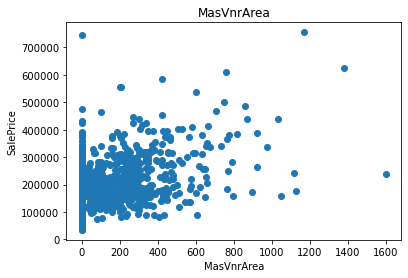

In [28]:
#lets find out some columns relationship with the sale price
plt.scatter(df1['MasVnrArea'],df1['SalePrice'])
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.title('MasVnrArea')

Text(0.5, 1.0, 'LotArea')

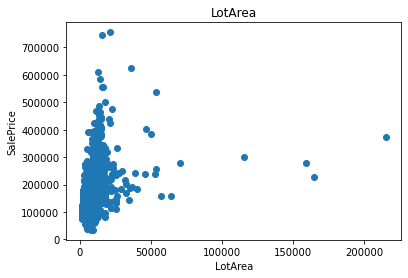

In [29]:
plt.scatter(df1['LotArea'],df1['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('LotArea')

Text(0.5, 1.0, 'BsmtFinSF1')

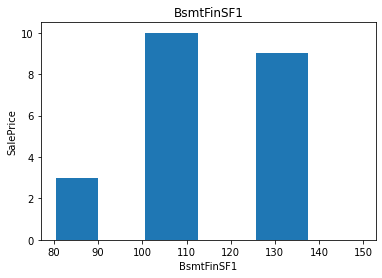

In [30]:
plt.hist([df1['BsmtFinSF1'],df1['SalePrice']],bins=[80,100,125,150],rwidth=0.95)
plt.xlabel('BsmtFinSF1')
plt.ylabel('SalePrice')
plt.title('BsmtFinSF1')

In [31]:
#outlier detection and removal using feature engineering tools

In [32]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


creating a SalePrice per LotArea(SPL) column to help in outlier detection

In [33]:
df1['SalePrice_per_LA']=df1['SalePrice']/df1['LotArea']
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_per_LA
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500,24.674556
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500,18.906250
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500,19.866667
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000,14.659686
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000,17.531557


In [34]:
df1.shape

(1460, 80)

In [35]:
lower_limit=df1['SalePrice_per_LA'].quantile(0.01)
upper_limit=df1['SalePrice_per_LA'].quantile(0.99)
df1[(df1['SalePrice_per_LA']<lower_limit) |(df1['SalePrice_per_LA']>upper_limit)].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_per_LA
30,70,C (all),50.0,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Gd,MnPrv,Shed,0,7,2008,WD,Normal,40000,4.705882
180,160,FV,69.0,2117,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Gd,MnPrv,Shed,0,6,2007,WD,Normal,177000,83.608880
249,50,RL,69.0,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,...,Gd,MnPrv,Shed,500,6,2007,WD,Normal,277000,1.742138
313,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,Sev,...,Gd,MnPrv,Shed,0,6,2009,WD,Normal,375000,1.742201
335,190,RL,69.0,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,...,Gd,MnPrv,Shed,700,8,2008,WD,Normal,228950,1.390441


I can simply mark the above as extreme values(outliers) which might affect the perfomance of my model


I picked LotArea to get SalePrice_per_LA because it has a well normalized(scalled) data which can give a good range

In [36]:
#droping the outliers
df2=df1[(df1['SalePrice_per_LA']>lower_limit) & (df1['SalePrice_per_LA']<upper_limit)]
df2.shape

(1430, 80)

Text(0, 0.5, 'Count')

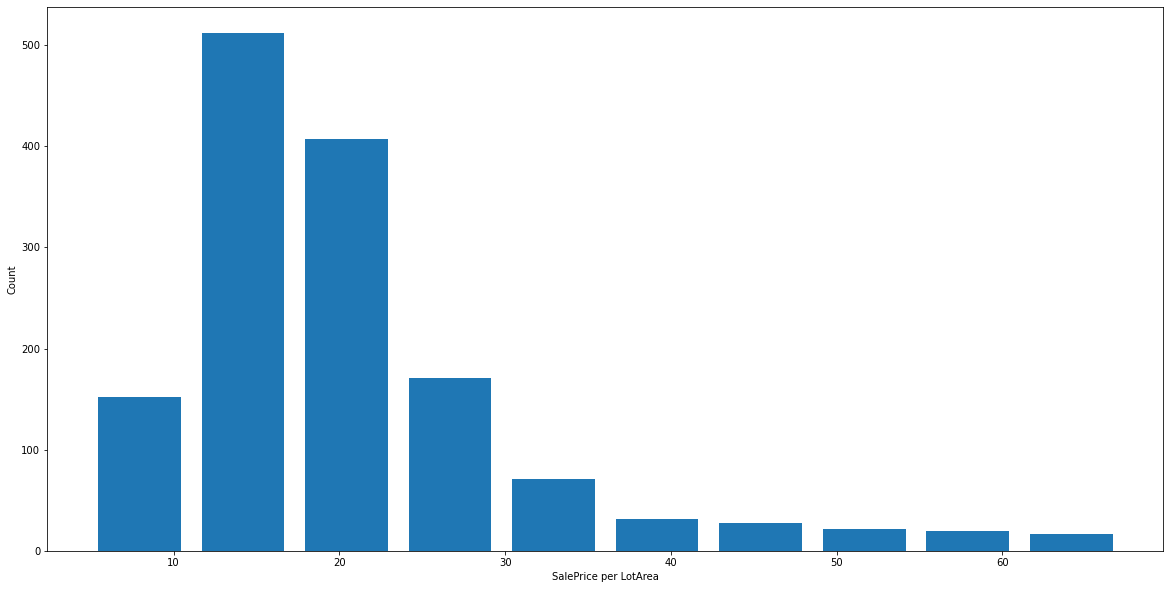

In [37]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df2.SalePrice_per_LA,rwidth=0.8)
plt.xlabel('SalePrice per LotArea')
plt.ylabel('Count')

In [38]:
#the above histogram is kinda takes a normal distribution shape with most values about the median and mean marks

next... is preparing my X_train and y_train to help in model creation

In [39]:
#i will drop the SalePrice and SalePrice_per_LA for my train data
df3=df2.drop('SalePrice_per_LA',axis='columns')
df3.shape

(1430, 79)

In [40]:
df3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [41]:
numerical_cols=[col for col in df3.columns if df3[col].dtypes!='O']
df4=df3[numerical_cols]
df4.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [42]:
numerical_cols=[col for col in df_test.columns if df_test[col].dtypes!='O']
df_test=df_test[numerical_cols]
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [43]:
##converting columns to dtype(float)
df4['MSSubClass']=pd.to_numeric(df4['MSSubClass'],errors='coerce').astype('float')
df4['LotArea']=pd.to_numeric(df4['LotArea'],errors='coerce').astype('float')
df4['OverallQual']=pd.to_numeric(df4['OverallQual'],errors='coerce').astype('float')
df4['OverallCond']=pd.to_numeric(df4['OverallCond'],errors='coerce').astype('float')
df4['BsmtFinSF1']=pd.to_numeric(df4['BsmtFinSF1'],errors='coerce').astype('float')
df4['BsmtFinSF2']=pd.to_numeric(df4['BsmtFinSF2'],errors='coerce').astype('float')
df4['BsmtUnfSF']=pd.to_numeric(df4['BsmtUnfSF'],errors='coerce').astype('float')
df4['TotalBsmtSF']=pd.to_numeric(df4['TotalBsmtSF'],errors='coerce').astype('float')
df4['1stFlrSF']=pd.to_numeric(df4['1stFlrSF'],errors='coerce').astype('float')
df4['2ndFlrSF']=pd.to_numeric(df4['2ndFlrSF'],errors='coerce').astype('float')
df4['LowQualFinSF']=pd.to_numeric(df4['LowQualFinSF'],errors='coerce').astype('float')
df4['GrLivArea']=pd.to_numeric(df4['GrLivArea'],errors='coerce').astype('float')
df4['BsmtFullBath']=pd.to_numeric(df4['BsmtFullBath'],errors='coerce').astype('float')
df4['BsmtHalfBath']=pd.to_numeric(df4['BsmtHalfBath'],errors='coerce').astype('float')
df4['FullBath']=pd.to_numeric(df4['FullBath'],errors='coerce').astype('float')
df4['HalfBath']=pd.to_numeric(df4['HalfBath'],errors='coerce').astype('float')
df4['BedroomAbvGr']=pd.to_numeric(df4['BedroomAbvGr'],errors='coerce').astype('float')
df4['KitchenAbvGr']=pd.to_numeric(df4['KitchenAbvGr'],errors='coerce').astype('float')
df4['TotRmsAbvGrd']=pd.to_numeric(df4['TotRmsAbvGrd'],errors='coerce').astype('float')
df4['Fireplaces']=pd.to_numeric(df4['Fireplaces'],errors='coerce').astype('float')
df4['GarageCars']=pd.to_numeric(df4['GarageCars'],errors='coerce').astype('float')
df4['GarageArea']=pd.to_numeric(df4['GarageArea'],errors='coerce').astype('float')
df4['WoodDeckSF']=pd.to_numeric(df4['WoodDeckSF'],errors='coerce').astype('float')
df4['OpenPorchSF']=pd.to_numeric(df4['OpenPorchSF'],errors='coerce').astype('float')
df4['EnclosedPorch']=pd.to_numeric(df4['EnclosedPorch'],errors='coerce').astype('float')
df4['3SsnPorch']=pd.to_numeric(df4['3SsnPorch'],errors='coerce').astype('float')
df4['ScreenPorch']=pd.to_numeric(df4['ScreenPorch'],errors='coerce').astype('float')
df4['PoolArea']=pd.to_numeric(df4['PoolArea'],errors='coerce').astype('float')
df4['MiscVal']=pd.to_numeric(df4['MiscVal'],errors='coerce').astype('float')
df4['MiscVal'].dtype

<ipython-input-43-e92a8faffc6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['MSSubClass']=pd.to_numeric(df4['MSSubClass'],errors='coerce').astype('float')
<ipython-input-43-e92a8faffc6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['LotArea']=pd.to_numeric(df4['LotArea'],errors='coerce').astype('float')
<ipython-input-43-e92a8faffc6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

dtype('float64')

In [44]:
df5=df4.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'],axis=1)
df5.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,196.0,706.0,0.0,150.0,856.0,...,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,208500
1,20.0,80.0,9600.0,6.0,8.0,0.0,978.0,0.0,284.0,1262.0,...,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,181500
2,60.0,68.0,11250.0,7.0,5.0,162.0,486.0,0.0,434.0,920.0,...,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,223500
3,70.0,60.0,9550.0,7.0,5.0,0.0,216.0,0.0,540.0,756.0,...,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,140000
4,60.0,84.0,14260.0,8.0,5.0,350.0,655.0,0.0,490.0,1145.0,...,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,250000


In [45]:
y_train=pd.to_numeric(df5['SalePrice'],errors='coerce').astype(float)
y_train.dtypes

dtype('float64')

In [46]:
df5.shape

(1430, 32)

In [47]:
##lets also convert the test dataset dtype to floats
##converting columns to dtype(float)
df_test['MSSubClass']=pd.to_numeric(df_test['MSSubClass'],errors='coerce').astype('float')
df_test['LotArea']=pd.to_numeric(df_test['LotArea'],errors='coerce').astype('float')
df_test['OverallQual']=pd.to_numeric(df_test['OverallQual'],errors='coerce').astype('float')
df_test['OverallCond']=pd.to_numeric(df_test['OverallCond'],errors='coerce').astype('float')
df_test['BsmtFinSF1']=pd.to_numeric(df_test['BsmtFinSF1'],errors='coerce').astype('float')
df_test['BsmtFinSF2']=pd.to_numeric(df_test['BsmtFinSF2'],errors='coerce').astype('float')
df_test['BsmtUnfSF']=pd.to_numeric(df_test['BsmtUnfSF'],errors='coerce').astype('float')
df_test['TotalBsmtSF']=pd.to_numeric(df_test['TotalBsmtSF'],errors='coerce').astype('float')
df_test['1stFlrSF']=pd.to_numeric(df_test['1stFlrSF'],errors='coerce').astype('float')
df_test['2ndFlrSF']=pd.to_numeric(df_test['2ndFlrSF'],errors='coerce').astype('float')
df_test['LowQualFinSF']=pd.to_numeric(df_test['LowQualFinSF'],errors='coerce').astype('float')
df_test['GrLivArea']=pd.to_numeric(df_test['GrLivArea'],errors='coerce').astype('float')
df_test['BsmtFullBath']=pd.to_numeric(df_test['BsmtFullBath'],errors='coerce').astype('float')
df_test['BsmtHalfBath']=pd.to_numeric(df_test['BsmtHalfBath'],errors='coerce').astype('float')
df_test['FullBath']=pd.to_numeric(df_test['FullBath'],errors='coerce').astype('float')
df_test['HalfBath']=pd.to_numeric(df_test['HalfBath'],errors='coerce').astype('float')
df_test['BedroomAbvGr']=pd.to_numeric(df_test['BedroomAbvGr'],errors='coerce').astype('float')
df_test['KitchenAbvGr']=pd.to_numeric(df_test['KitchenAbvGr'],errors='coerce').astype('float')
df_test['TotRmsAbvGrd']=pd.to_numeric(df_test['TotRmsAbvGrd'],errors='coerce').astype('float')
df_test['Fireplaces']=pd.to_numeric(df_test['Fireplaces'],errors='coerce').astype('float')
df_test['GarageCars']=pd.to_numeric(df_test['GarageCars'],errors='coerce').astype('float')
df_test['GarageArea']=pd.to_numeric(df_test['GarageArea'],errors='coerce').astype('float')
df_test['WoodDeckSF']=pd.to_numeric(df_test['WoodDeckSF'],errors='coerce').astype('float')
df_test['OpenPorchSF']=pd.to_numeric(df_test['OpenPorchSF'],errors='coerce').astype('float')
df_test['EnclosedPorch']=pd.to_numeric(df_test['EnclosedPorch'],errors='coerce').astype('float')
df_test['3SsnPorch']=pd.to_numeric(df_test['3SsnPorch'],errors='coerce').astype('float')
df_test['ScreenPorch']=pd.to_numeric(df_test['ScreenPorch'],errors='coerce').astype('float')
df_test['PoolArea']=pd.to_numeric(df_test['PoolArea'],errors='coerce').astype('float')
df_test['MiscVal']=pd.to_numeric(df_test['MiscVal'],errors='coerce').astype('float')
df_test['MiscVal'].dtype

dtype('float64')

In [48]:
X_test1=df_test.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'],axis=1)
X_test1.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1461,20.0,80.0,11622.0,5.0,6.0,0.0,468.0,144.0,270.0,...,0.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0
1,1462,20.0,81.0,14267.0,6.0,6.0,108.0,923.0,0.0,406.0,...,0.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0


In [49]:
X_test=X_test1.drop('Id',axis='columns')
X_test.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,20.0,80.0,11622.0,5.0,6.0,0.0,468.0,144.0,270.0,882.0,...,0.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0
1,20.0,81.0,14267.0,6.0,6.0,108.0,923.0,0.0,406.0,1329.0,...,0.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0


In [50]:
X_train=df5.drop('SalePrice',axis='columns')
X_test
y_train.shape

(1430,)

choosing the best model for training our data

we will use GridSearchCV to come up with the best model and the the best parameters

In [51]:
#import several regression algorithms for testing the one with best perfomance
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [52]:
cross_val_score(LinearRegression(),X_train,y_train)

array([0.83607495, 0.88518357, 0.83889107, 0.82296707, 0.83592535])

In [53]:
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for mn,config in models.items():
        clf=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        clf.fit(X_train,y_train)
        my_scores.append({
            'model':mn,
            'best_score':clf.best_score_,
            'best_params':clf.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [54]:
find_best_model_using_gridsearchcv(X_train,y_train)

,model,best_score,best_params
0,linear_regression,0.832680,{'normalize': True}
1,lasso,0.832648,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.750717,"{'criterion': 'mse', 'splitter': 'random'}"


from the above analysis,i can conclude that linear regression is the best for the model creation

In [55]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

now the model is trained,we can now use it for SalePrice predictions

In [56]:
y_predicted=model.predict(X_test)
y_predicted=np.round(y_predicted,2)
y_predicted[:10]

array([131251.45, 177666.65, 177636.4 , 196396.04, 198332.28, 175560.54,
       186121.65, 159120.17, 207019.51, 112691.69])

preparing the submission cv file

In [57]:
X_test1.shape

(1459, 32)

In [58]:
y_predicted.shape

(1459,)

In [59]:
y_predicted

array([131251.45, 177666.65, 177636.4 , ..., 185330.74,  89126.22,
       252011.21])

In [60]:
X_test1.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1461,20.0,80.0,11622.0,5.0,6.0,0.0,468.0,144.0,270.0,...,0.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0
1,1462,20.0,81.0,14267.0,6.0,6.0,108.0,923.0,0.0,406.0,...,0.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0


In [61]:
X_test1.shape

(1459, 32)

In [62]:
X_test1['SalePrice']=y_predicted
X_test1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1461,20.0,80.0,11622.0,5.0,6.0,0.0,468.0,144.0,270.0,...,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,131251.45
1,1462,20.0,81.0,14267.0,6.0,6.0,108.0,923.0,0.0,406.0,...,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,177666.65
2,1463,60.0,74.0,13830.0,5.0,5.0,0.0,791.0,0.0,137.0,...,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,177636.40
3,1464,60.0,78.0,9978.0,6.0,6.0,20.0,602.0,0.0,324.0,...,2.0,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,196396.04
4,1465,120.0,43.0,5005.0,8.0,5.0,0.0,263.0,0.0,1017.0,...,2.0,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,198332.28


In [63]:
sample_submission=X_test1[['Id','SalePrice']]
sample_submission.head(10)

,Id,SalePrice
0,1461,131251.45
1,1462,177666.65
2,1463,177636.40
3,1464,196396.04
4,1465,198332.28
5,1466,175560.54
6,1467,186121.65
7,1468,159120.17
8,1469,207019.51
9,1470,112691.69


saving the submission csv file

In [65]:
sample_submission.to_csv('sample_submission.csv',index=False)